<a href="https://colab.research.google.com/github/fizzah09/WEBSCRAPPING-PROJECT-1/blob/main/WEBSCRAPPING_OLYMPIC_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OLYMPIC DATA SCRAPING 2024
## H! iam  [Fizzah abdullah ](https://www.linkedin.com/in/fizzah-abdullah-b04174297)currently doing becholers in data science form Ned university of engineering & technology . here is my latest web scrapping project ,hope you liked it.
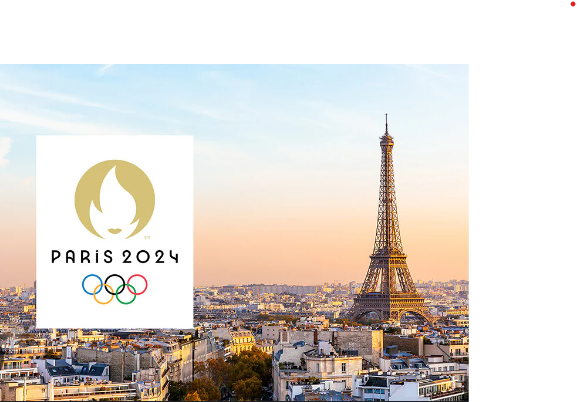

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
url = 'https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table'
response = requests.get(url)
html_content = response.text


In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')
medal_table = soup.find('table', {'class': 'wikitable'})

# Step 4: Extract the header of the table
header = [th.get_text(strip=True) for th in medal_table.find_all('th')]
desired_columns = ["Rank","Gold", "Silver", "Bronze"]
selected_header = [col for col in header if col in desired_columns]

print(selected_header)


['Rank', 'Gold', 'Silver', 'Bronze']


In [ ]:
# prompt: i want only  rank , noc , gold , sliver,bronze

from bs4 import BeautifulSoup
import requests

url = 'https://en.wikipedia.org/wiki/2024_Summer_Olympics_medal_table'
response = requests.get(url)
html_content = response.text

soup = BeautifulSoup(html_content, 'html.parser')
medal_table = soup.find('table', {'class': 'wikitable'})

# Extract the header of the table
header = [th.get_text(strip=True) for th in medal_table.find_all('th')]

# Select the desired columns
desired_columns = ["NOC","Rank", "Gold", "Silver", "Bronze","Total"]
selected_header = [col for col in header if col in desired_columns]

print(selected_header)


['Rank', 'NOC', 'Gold', 'Silver', 'Bronze', 'Total']


In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(columns= selected_header)
df

,Rank,NOC,Gold,Silver,Bronze,Total


In [ ]:
# Iterate over table rows (<tr>) instead of table headers (<th>)
rows = medal_table.find_all('tr')
J = []
for row in rows:
    row_data = []
    # Extract country name if it's in a <th> tag
    country_cell = row.find('th') # De-indent this line to align with the 'for cell in row.find_all('td'):' loop
    if country_cell:
        row_data.append(country_cell.text.strip())
    # Extract data from <td> tags
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())


    J.append(','.join(row_data))  # Join cell data with commas
J

['Rank',
 'United States,1,40,44,42,126',
 'China,2,40,27,24,91',
 'Japan,3,20,12,13,45',
 'Australia,4,18,19,16,53',
 'France*,5,16,26,22,64',
 'Netherlands,6,15,7,12,34',
 'Great Britain,7,14,22,29,65',
 'South Korea,8,13,9,10,32',
 'Italy,9,12,13,15,40',
 'Germany,10,12,13,8,33',
 'New Zealand,11,10,7,3,20',
 'Canada,12,9,7,11,27',
 'Uzbekistan,13,8,2,3,13',
 'Hungary,14,6,7,6,19',
 'Spain,15,5,4,9,18',
 'Sweden,16,4,4,3,11',
 'Kenya,17,4,2,5,11',
 'Norway,18,4,1,3,8',
 'Ireland,19,4,0,3,7',
 'Brazil,20,3,7,10,20',
 'Iran,21,3,6,3,12',
 'Ukraine,22,3,5,4,12',
 'Romania,23,3,4,2,9',
 'Georgia,24,3,3,1,7',
 'Belgium,25,3,1,6,10',
 'Bulgaria,26,3,1,3,7',
 'Serbia,27,3,1,1,5',
 'Czech Republic,28,3,0,2,5',
 'Denmark,29,2,2,5,9',
 'Azerbaijan,30,2,2,3,7',
 'Croatia,2,2,3,7',
 'Cuba,32,2,1,6,9',
 'Bahrain,33,2,1,1,4',
 'Slovenia,34,2,1,0,3',
 'Chinese Taipei,35,2,0,5,7',
 'Austria,36,2,0,3,5',
 'Hong Kong,37,2,0,2,4',
 'Philippines,2,0,2,4',
 'Algeria,39,2,0,1,3',
 'Indonesia,2,0,1,3',
 '

In [ ]:
import pandas as pd

# Iterate over table rows (<tr>) starting from the second row (index 1) to skip the header
rows = medal_table.find_all('tr')[1:]
data = []
for row in rows:
    row_data = []
    # Extract country name and rank from <th> tags
    for header_cell in row.find_all('th'):
        row_data.append(header_cell.text.strip())
    # Extract medal counts from <td> tags
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    data.append(row_data)

# Create the DataFrame
df = pd.DataFrame(data, columns=["Rank", "NOC", "Gold", "Silver", "Bronze", "Total"])

# Convert medal columns to numeric, handling non-numeric values as 0
df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(0).astype(int)
df['Silver'] = pd.to_numeric(df['Silver'], errors='coerce').fillna(0).astype(int)
df['Bronze'] = pd.to_numeric(df['Bronze'], errors='coerce').fillna(0).astype(int)

# Calculate the 'Total' column
df['Total'] = df['Gold'] + df['Silver'] + df['Bronze']

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df

,Rank,NOC,Gold,Silver,Bronze,Total
0,United States,1,40,44,42,126
1,China,2,40,27,24,91
2,Japan,3,20,12,13,45
3,Australia,4,18,19,16,53
4,France*,5,16,26,22,64
5,Netherlands,6,15,7,12,34
6,Great Britain,7,14,22,29,65
7,South Korea,8,13,9,10,32
8,Italy,9,12,13,15,40
9,Germany,10,12,13,8,33


In [ ]:
df.to_csv('olympics2024.csv', index=False)

HOPED YOU ENJOY , BYE!